In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [227]:
data = pd.read_csv("/content/drive/MyDrive/Inter IIT Competition Data/btcusdt_1h.csv")
data

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
35203  2022-01-12 01:30:00  42972.04  43095.26  42692.19  42800.38   
35204  2022-01-12 02:30:00  42797.62  42823.69  42643.74  42659.20   
35205  2022-01-12 03:30:00  42664.71  42776.14  42597.41  42713.13   
35206  2022-01-12 04:30:00  42713.12  42886.28  42633.97  42729.29   
35207  2022-01-12 05:30:00  42729.29  42965.00  42578.02  42675.00   

            volume  
0       443.356199  
1       383.697006  
2       429.064572  
3       420.087030  
4       340.807329  
...            ...  
35203  1219.601780  
35204   702.103800  
35205   561.859930  
35206   681.142010  
35207  1004.906890  

[35208 rows x 6 columns]

In [4]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4473    0  4473    0     0   6937      0 --:--:-- --:--:-- --:--:--  6945
100  517k  100  517k    0     0   415k      0  0:00:01  0:00:01 --:--:-- 1371k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4489    0  4489    0     0  10365      0 --:--:-- --:--:-- --:--:-- 10488
100  392k  100  392k    0     0   407k      0 --:--:-- --:--:-- --:--:--  407k


In [228]:
data['hammer'] = talib.CDLHAMMER(data.open, data.high, data.low, data.close)
data['hanging_man'] =talib.CDLHANGINGMAN(data.open, data.high, data.low, data.close)
data['doji'] = talib.CDLDOJI(data.open, data.high, data.low, data.close)
data['spinning_top'] = talib.CDLSPINNINGTOP(data.open, data.high, data.low, data.close)
data['engulfing'] = talib.CDLENGULFING(data.open, data.high, data.low, data.close)
data['RSI'] = talib.RSI(data.close, timeperiod=14)
data['slowk'], data['slowd'] = talib.STOCH(data.high, data.low, data.close, fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [6]:
data

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
35203  2022-01-12 01:30:00  42972.04  43095.26  42692.19  42800.38   
35204  2022-01-12 02:30:00  42797.62  42823.69  42643.74  42659.20   
35205  2022-01-12 03:30:00  42664.71  42776.14  42597.41  42713.13   
35206  2022-01-12 04:30:00  42713.12  42886.28  42633.97  42729.29   
35207  2022-01-12 05:30:00  42729.29  42965.00  42578.02  42675.00   

            volume  hammer  hanging_man  doji  spinning_top  engulfing  \
0       443.356199       0            0     0             0          0   
1       383.697006       0            0     0             0          0   
2       429.064572       0            0     0             0          0   
3       420.087030       0            0     0             0          0   
4       340.807329       0            0     0             0          0   
...            ...     ...          ...   ...           ...        ...   
35203  1219.601780       0            0     0             0          0   
35204   702.103800       0            0     0             0          0   
35205   561.859930       0            0   100           100          0   
35206   681.142010       0            0   100           100          0   
35207  1004.906890       0            0     0          -100          0   

             RSI      slowk      slowd  
0            NaN        NaN        NaN  
1            NaN        NaN        NaN  
2            NaN        NaN        NaN  
3            NaN        NaN        NaN  
4            NaN        NaN        NaN  
...          ...        ...        ...  
35203  62.352113  85.935910  82.186799  
35204  59.368552  84.191939  83.829249  
35205  60.152924  79.478483  83.202111  
35206  60.399616  78.184340  80.618254  
35207  59.076386  78.471968  78.711597  

[35208 rows x 14 columns]

In [7]:
!pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [8]:
import vectorbt as vbt

In [229]:
data['sma_10'] = data['close'].rolling(window=10).mean()
data['sma_05'] = data['close'].rolling(window=5).mean()
data['sma_20'] = data['close'].rolling(window=20).mean()
data['sma_30'] = data['close'].rolling(window=30).mean()
data['sma_50'] = data['close'].rolling(window=50).mean()
data['sma_200'] = data['close'].rolling(window=200).mean()
data['sma_600'] = data['close'].rolling(window=600).mean()
data['sma_40'] = data['close'].rolling(window=40).mean()
data['sma_120'] = data['close'].rolling(window=120).mean()
data['ema_05'] = talib.EMA(data['close'], timeperiod=5)
data['ema_10'] = talib.EMA(data['close'], timeperiod=10)
data['ema_30'] = talib.EMA(data['close'], timeperiod=30)
data['MACD'], _, _ = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['typical_price'] = (data['high'] + data['low'] + data['close']) / 3
data['cumulative_price_volume'] = data['typical_price'] * data['volume']
data['cumulative_volume'] = data['volume'].cumsum()
data['cumulative_price'] = data['cumulative_price_volume'].cumsum()
data['vwap'] = data['cumulative_price'] / data['cumulative_volume']

In [230]:
# Additional features
data['Stochastic Oscillator'] = talib.STOCH(data['high'], data['low'], data['close'])[1]
data['Average True Range'] = talib.ATR(data['high'], data['low'], data['close'], timeperiod=14)
data['Bollinger Bands Width'] = (talib.BBANDS(data['close'])[0] - talib.BBANDS(data['close'])[2]) / talib.BBANDS(data['close'])[1]
data

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
35203  2022-01-12 01:30:00  42972.04  43095.26  42692.19  42800.38   
35204  2022-01-12 02:30:00  42797.62  42823.69  42643.74  42659.20   
35205  2022-01-12 03:30:00  42664.71  42776.14  42597.41  42713.13   
35206  2022-01-12 04:30:00  42713.12  42886.28  42633.97  42729.29   
35207  2022-01-12 05:30:00  42729.29  42965.00  42578.02  42675.00   

            volume  hammer  hanging_man  doji  spinning_top  ...  \
0       443.356199       0            0     0             0  ...   
1       383.697006       0            0     0             0  ...   
2       429.064572       0            0     0             0  ...   
3       420.087030       0            0     0             0  ...   
4       340.807329       0            0     0             0  ...   
...            ...     ...          ...   ...           ...  ...   
35203  1219.601780       0            0     0             0  ...   
35204   702.103800       0            0     0             0  ...   
35205   561.859930       0            0   100           100  ...   
35206   681.142010       0            0   100           100  ...   
35207  1004.906890       0            0     0          -100  ...   

             ema_30        MACD  typical_price  cumulative_price_volume  \
0               NaN         NaN   13548.223333             6.006689e+06   
1               NaN         NaN   13318.110000             5.110119e+06   
2               NaN         NaN   13316.203333             5.713511e+06   
3               NaN         NaN   13437.100000             5.644751e+06   
4               NaN         NaN   13515.483333             4.606176e+06   
...             ...         ...            ...                      ...   
35203  42079.267611  243.644459   42862.610000             5.227532e+07   
35204  42116.682604  249.449272   42708.876667             2.998606e+07   
35205  42155.163081  255.456585   42695.560000             2.398892e+07   
35206  42192.203528  258.541099   42749.846667             2.911872e+07   
35207  42223.351687  253.680578   42739.340000             4.294906e+07   

       cumulative_volume  cumulative_price          vwap  \
0           4.433562e+02      6.006689e+06  13548.223333   
1           8.270532e+02      1.111681e+07  13441.466239   
2           1.256118e+03      1.683032e+07  13398.678949   
3           1.676205e+03      2.247507e+07  13408.307955   
4           2.017012e+03      2.708125e+07  13426.416995   
...                  ...               ...           ...   
35203       8.028076e+07      1.675041e+12  20864.785538   
35204       8.028146e+07      1.675071e+12  20864.976576   
35205       8.028202e+07      1.675095e+12  20865.129359   
35206       8.028271e+07      1.675124e+12  20865.315035   
35207       8.028371e+07      1.675167e+12  20865.588831   

       Stochastic Oscillator  Average True Range  Bollinger Bands Width  
0                        NaN                 NaN                    NaN  
1                        NaN                 NaN                    NaN  
2                        NaN                 NaN                    NaN  
3                        NaN                 NaN                    NaN  
4                        NaN                 NaN               0.042113  
...                      ...                 ...                    ...  
35203              81.499014          521.606389               0.012832  
35204              78.935774          497.202361               0.013264  
35205              70.890492          474.454335               0.009982 

In [ ]:
!pip install autotrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.5/146.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.6/552.6 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.3.2-py3-none-any.whl size=11334249 sha256=453c4ffbda8825d3233c689556e7b77added511b53c45155c34efc0721241891
  Stored in directory: /root/.cache/pip/wheels/54/0c/f5/4cef347f52dc05bb35491b0a623042de57a2be60049b2ca454
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.2
    Uninstalling bokeh-3.3.2:
   

In [ ]:
from autotrader import indicators
from autotrader.autoplot import AutoPlot

In [ ]:
ohlcv = pd.DataFrame({
    'Open': data['open'],
    'High': data['high'],
    'Low': data['low'],
    'Close': data['close'],
    'Volume': data['volume']
})

In [ ]:
rsi_divergence = indicators.autodetect_divergence(ohlcv, data['RSI'])

In [ ]:
rsi_divergence[rsi_divergence['hiddenBear'] != 0]

regularBull  regularBear  hiddenBull  hiddenBear
65             0.0          0.0         0.0         1.0
86             0.0          0.0         0.0         1.0
154            0.0          0.0         0.0         1.0
187            0.0          0.0         0.0         1.0
268            0.0          0.0         0.0         1.0
...            ...          ...         ...         ...
34875          0.0          0.0         0.0         1.0
34947          0.0          0.0         0.0         1.0
35071          0.0          0.0         0.0         1.0
35105          0.0          0.0         0.0         1.0
35117          0.0          0.0         0.0         1.0

[443 rows x 4 columns]

In [ ]:
data.head(15)

datetime      open      high       low     close      volume  \
0   2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199   
1   2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006   
2   2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572   
3   2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030   
4   2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329   
5   2018-01-01 10:30:00  13615.20  13699.00  13526.50  13558.99  404.229046   
6   2018-01-01 11:30:00  13539.00  13800.00  13510.00  13780.41  264.989684   
7   2018-01-01 12:30:00  13780.00  13818.55  13555.02  13570.35  292.188777   
8   2018-01-01 13:30:00  13569.98  13735.24  13400.00  13499.99  271.813553   
9   2018-01-01 14:30:00  13499.97  13670.00  13459.11  13616.99  213.095829   
10  2018-01-01 15:30:00  13632.00  13657.92  13497.98  13570.01  169.512196   
11  2018-01-01 16:30:00  13573.00  13589.89  13001.13  13220.56  665.334353   
12  2018-01-01 17:30:00  13220.56  13300.00  13056.23  13172.42  260.492708   
13  2018-01-01 18:30:00  13150.05  13200.41  12815.70  13017.00  451.901126   
14  2018-01-01 19:30:00  12999.71  13245.00  12750.00  13211.39  692.467362   

    hammer  hanging_man  doji  spinning_top  ...  slowk  slowd     sma_10  \
0        0            0     0             0  ...    NaN    NaN        NaN   
1        0            0     0             0  ...    NaN    NaN        NaN   
2        0            0     0             0  ...    NaN    NaN        NaN   
3        0            0     0             0  ...    NaN    NaN        NaN   
4        0            0     0             0  ...    NaN    NaN        NaN   
5        0            0     0             0  ...    NaN    NaN        NaN   
6        0            0     0             0  ...    NaN    NaN        NaN   
7        0            0     0             0  ...    NaN    NaN        NaN   
8        0            0     0             0  ...    NaN    NaN        NaN   
9        0            0     0             0  ...    NaN    NaN  13510.002   
10       0            0     0             0  ...    NaN    NaN  13514.102   
11       0            0     0             0  ...    NaN    NaN  13515.852   
12       0            0     0          -100  ...    NaN    NaN  13500.076   
13       0            0     0             0  ...    NaN    NaN  13460.773   
14       0            0     0             0  ...    NaN    NaN  13421.811   

       sma_05  sma_20  sma_30  sma_200  sma_600  sma_40  sma_120  
0         NaN     NaN     NaN      NaN      NaN     NaN      NaN  
1         NaN     NaN     NaN      NaN      NaN     NaN      NaN  
2         NaN     NaN     NaN      NaN      NaN     NaN      NaN  
3         NaN     NaN     NaN      NaN      NaN     NaN      NaN  
4   13414.658     NaN     NaN      NaN      NaN     NaN      NaN  
5   13420.654     NaN     NaN      NaN      NaN     NaN      NaN  
6   13536.124     NaN     NaN      NaN      NaN     NaN      NaN  
7   13584.158     NaN     NaN      NaN      NaN     NaN      NaN  
8   13602.150     NaN     NaN      NaN      NaN     NaN      NaN  
9   13605.346     NaN     NaN      NaN      NaN     NaN      NaN  
10  13607.550     NaN     NaN      NaN      NaN     NaN      NaN  
11  13495.580     NaN     NaN      NaN      NaN     NaN      NaN  
12  13415.994     NaN     NaN      NaN      NaN     NaN      NaN  
13  13319.396     NaN     NaN      NaN      NaN     NaN      NaN  
14  13238.276     NaN     NaN      NaN      NaN     NaN      NaN  

[15 rows x 22 columns]

In [10]:
!pip install empyrical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 965.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=d96f13639280e95da2c9a4f5ef2007c5d6377e53a92e57994fd035d3acff7774
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built empyrical


In [11]:
from empyrical import max_drawdown

In [12]:
import numpy as np

In [13]:
import tensorflow as tf
# print(tf.__version__)
# print(tf.config.list_physical_devices('GPU'))
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(synchronized=True),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(synchronized=True),
    tf.keras.layers.Dense(16, activation='relu')  ,
    tf.keras.layers.Dense(2)
])

In [14]:
model.build(input_shape = (1,10))

In [15]:
model.load_weights('/content/drive/MyDrive/Inter IIT Competition Data/classifier_1hr_nn.h5')

In [16]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [231]:
data['diff'] = data['close'].diff()

In [232]:
# Create lag features for momentum
data['Price_Ret'] = data['close'].pct_change()
data['Price_Momentum'] = data['Price_Ret'].rolling(window=5).mean()

In [308]:
from scipy.signal import argrelextrema
# Set the window size for finding local maxima
window_size = 24

# Find indices of local maxima using argrelextrema
local_maxima_indices = argrelextrema(data['close'].values, np.greater, order=window_size)[0]
local_minima_indices = argrelextrema(data['close'].values, np.less, order=window_size)[0]

# Mark local maxima in the DataFrame
data['is_maxima'] = 0
data.loc[local_maxima_indices, 'is_maxima'] = 1

# Mark local minima in the DataFrame
data['is_minima'] = 0
data.loc[local_minima_indices, 'is_minima'] = 1

In [332]:
# Create binary labels (1 for price increase, 0 for price decrease)
data['Price_Up'] = (data['Price_Ret'] > 0).astype(int)
data['Price_Up'] = data['Price_Up'].shift(-1)

cp = data.copy()
# Drop NaN values resulting from the calculation of technical indicators and lag features
cp.dropna(inplace=True)

# Define features and target variable
features = ['RSI', 'ema_10', 'MACD', 'Price_Momentum']
X_rf = cp[features]

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [377]:
# Train a random forest minima classifier
y = cp['is_minima']
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)
rf_minima_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_minima_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [378]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix
y_pred = rf_minima_classifier.predict(X_rf)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y, y_pred)
print(confusion_matrix(y, y_pred))
print("Accuracy:", accuracy)

[[34101     3]
 [  159   345]]
Accuracy: 0.9953190013869625


In [379]:
# Train a random forest maxima classifier
y = cp['is_maxima']
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)
rf_maxima_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_maxima_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [380]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix
y_pred = rf_maxima_classifier.predict(X_rf)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y, y_pred)
print(confusion_matrix(y, y_pred))
print("Accuracy:", accuracy)

[[34121     2]
 [  152   333]]
Accuracy: 0.9955501618122977


In [381]:
def rf_minima_classify(i):
  x_feat = data[features].iloc[[i]]
  y_pred = rf_minima_classifier.predict(x_feat)
  return y_pred

In [382]:
def rf_maxima_classify(i):
  x_feat = data[features].iloc[[i]]
  y_pred = rf_maxima_classifier.predict(x_feat)
  return y_pred

In [383]:
add_features = [
    'Stochastic Oscillator', 'Average True Range', 'Bollinger Bands Width',
    'volume', 'slowk'
]

In [384]:
from sklearn.tree import DecisionTreeClassifier
X_dt = cp[features + add_features]
y = cp['is_minima']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dt, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
dt_minima_classifier = DecisionTreeClassifier(random_state=42)
dt_minima_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_minima_classifier.predict(X_dt)

# Evaluate the accuracy of the Decision Tree classifier
accuracy_dt = accuracy_score(y, y_pred_dt)
print("Accuracy of Decision Tree classifier:", accuracy_dt)
print(confusion_matrix(y, y_pred_dt))

Accuracy of Decision Tree classifier: 0.9911581137309292
[[33936   168]
 [  138   366]]


In [385]:
y = cp['is_maxima']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dt, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
dt_maxima_classifier = DecisionTreeClassifier(random_state=42)
dt_maxima_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_maxima_classifier.predict(X_dt)

# Evaluate the accuracy of the Decision Tree classifier
accuracy_dt = accuracy_score(y, y_pred_dt)
print("Accuracy of Decision Tree classifier:", accuracy_dt)
print(confusion_matrix(y, y_pred_dt))

Accuracy of Decision Tree classifier: 0.9919093851132686
[[33979   144]
 [  136   349]]


In [386]:
def dt_minima_classify(i):
  x_feat = data[features + add_features].iloc[[i]]
  y_pred = dt_minima_classifier.predict(x_feat)
  return y_pred

In [387]:
def dt_maxima_classify(i):
  x_feat = data[features + add_features].iloc[[i]]
  y_pred = dt_maxima_classifier.predict(x_feat)
  return y_pred

In [388]:
data['rf_minima_classify'] = 0
data['rf_maxima_classify'] = 0
data['dt_minima_classify'] = 0
data['dt_maxima_classify'] = 0
for i in range(600, len(data)):
  data.at[i, 'rf_minima_classify'] = rf_minima_classify(i)
  data.at[i, 'rf_maxima_classify'] = rf_maxima_classify(i)
  data.at[i, 'dt_minima_classify'] = dt_minima_classify(i)
  data.at[i, 'dt_maxima_classify'] = dt_maxima_classify(i)

In [392]:
def entry(i):
  if data['rf_minima_classify'][i] == 1 and data['dt_minima_classify'][i] == 1:
    last_10_close = data['diff'][i - 9 : i + 1]
    last_10_close = np.array(last_10_close)
    last_10_close = last_10_close.reshape(1, 10)
    output = model.predict(last_10_close)
    if output[0][0] < output[0][1]:
      return True
    else:
      return False
  else:
    return False

In [393]:
def exit(i):
  if data['rf_maxima_classify'][i] == 1 and data['dt_maxima_classify'][i] == 1:
    last_10_close = data['diff'][i - 9 : i + 1]
    last_10_close = np.array(last_10_close)
    last_10_close = last_10_close.reshape(1, 10)
    output = model.predict(last_10_close)
    if output[0][0] > output[0][1]:
      return True
    else:
      return False
  else:
    return False

In [182]:
def bullish_entry(i):
  if
    return True
  else:
    return False

In [183]:
def long_exit(i, j):
  sum1 = data['Price_Up'][i - 9 : i + 1].sum()
  if sum1 <= 3 and exit(i):
    return True
  else:
    return False

In [165]:
def bearish_entry(i):
  if data['sma_10'][i] < data['sma_30'][i] and exit(i):
    return True
  else:
    return False

In [176]:
def short_exit(i, j):
  if data['close'][i] < data['close'][j]:
    return True
  else:
    return False

In [361]:
initial_balance = 100000
max_drawdown_limit = 0.03

In [394]:
returns = []
data['signal'] = 0
data['short_signal'] = 0
position = 0
in_trade = False
short_trade = False
buy_price = 0
peak = 0
fees = 0
buy_index = 0

for i in range(600, len(data)):
  if i < len(data) - 1 and not in_trade and not short_trade and entry(i):
      # Buy signal
      buy_price = data['close'][i]
      data.at[i, 'signal'] = 1
      in_trade = True
      fees += 1
      buy_index = i
  elif in_trade and exit(i):
      # Sell signal
      pnl = (data['close'][i] - buy_price) / buy_price
      returns.append(pnl)
      fees += data['close'][i] / buy_price
      data.at[i, 'signal'] = -1
      in_trade = False
  elif in_trade and data['close'][i] < buy_price * (1 - max_drawdown_limit):
      # Sell signal
      pnl = (data['close'][i] - buy_price) / buy_price
      returns.append(pnl)
      fees += data['close'][i] / buy_price
      data.at[i, 'signal'] = -1
      in_trade = False

  elif i < len(data) - 1 and not short_trade and not in_trade and exit(i) == True:
      # Short sell
      data.at[i, 'signal'] = -1
      data.at[i, 'short_signal'] = -1
      buy_price = data['close'][i]
      fees += 1
      buy_index = i
      short_trade = True
  elif short_trade and entry(i) == True:
      # Short buy back
      pnl = (buy_price - data['close'][i]) / buy_price
      returns.append(pnl)
      data.at[i, 'signal'] = 1
      data.at[i, 'short_signal'] = 1
      fees += data['close'][i] / buy_price
      short_trade = False
  elif short_trade and data['close'][i] > (1 + max_drawdown_limit) * buy_price:
      # Short buy back
      pnl = (buy_price - data['close'][i]) / buy_price
      returns.append(pnl)
      data.at[i, 'signal'] = 1
      data.at[i, 'short_signal'] = 1
      fees += data['close'][i] / buy_price
      short_trade = False
if in_trade:
  data.at[len(data) - 1, 'signal'] = -1
  pnl = (data['close'][i] - buy_price) / buy_price
  fees += data['close'][i] / buy_price
  returns.append(pnl)
if short_trade:
  data.at[len(data) - 1, 'signal'] = 1
  data.at[len(data) - 1, 'short_signal'] = 1
  pnl = (buy_price - data['close'][i]) / buy_price
  fees += data['close'][i] / buy_price
  returns.append(pnl)

1/1 [==============================] - 0s 23ms/step


In [395]:
returns = np.array(returns)
print(returns[returns > 0].shape, returns[returns > 0].mean())
print(returns[returns < 0].shape, returns[returns < 0].mean())
cum_pnl = 1 + np.sum(returns)
mxd = max_drawdown(returns)
print('Drawdown: ', mxd)
print('Total PNL: ', cum_pnl)
print('Fees: ', fees)
print('Return: ', ((cum_pnl - 1) * 1000 - fees) / 10, '%')

(219,) 0.08486921853146193
(36,) -0.03766157725929548
Drawdown:  -0.07891509018289045
Total PNL:  18.230542077055524
Fees:  510.44438808797673
Return:  1672.0097688967548 %


In [396]:
data[data['signal'] != 0]

datetime      open      high       low     close  \
653    2018-01-28 11:30:00  11905.70  12244.00  11870.00  12213.06   
719    2018-01-31 05:30:00  10230.00  10237.51   9768.00   9829.99   
778    2018-02-02 16:30:00   8337.21   8425.00   8250.92   8299.75   
841    2018-02-05 07:30:00   8104.07   8188.00   7910.00   8038.62   
870    2018-02-06 12:30:00   6250.79   6374.00   6000.01   6043.00   
...                    ...       ...       ...       ...       ...   
35029  2022-01-04 19:30:00  46955.22  47500.10  46805.54  47333.38   
35033  2022-01-04 23:30:00  46555.00  46719.78  45500.00  45750.00   
35059  2022-01-06 01:30:00  44685.93  44847.99  43722.54  43967.01   
35102  2022-01-07 20:30:00  41894.40  41915.36  40610.00  41319.11   
35154  2022-01-10 00:30:00  41966.99  42740.00  41928.01  42695.26   

            volume  hammer  hanging_man  doji  spinning_top  ...  Price_Up  \
653    1032.261103       0            0     0             0  ...       0.0   
719    1886.935967       0            0     0             0  ...       1.0   
778    2005.096794       0            0     0          -100  ...       1.0   
841    1619.008358       0            0     0          -100  ...       1.0   
870    3831.130173       0            0     0             0  ...       1.0   
...            ...     ...          ...   ...           ...  ...       ...   
35029  3051.437680       0            0     0             0  ...       0.0   
35033  4580.410410       0            0     0             0  ...       1.0   
35059  8054.811160       0            0     0             0  ...       0.0   
35102  5256.543940       0            0     0             0  ...       1.0   
35154  2007.335240       0            0     0             0  ...       0.0   

       rf_classify  dt_classify  signal  short_signal  is_minima  \
653              0            0      -1            -1          0   
719              1            1       1             1          1   
778              1            1       1             0          1   
841              1            1      -1             0          0   
870              1            1       1             0          1   
...            ...          ...     ...           ...        ...   
35029            0            0      -1             0          0   
35033            1            1       1             0          1   
35059            0            0      -1             0          0   
35102            1            1       1             0          1   
35154            0            0      -1             0          0   

       rf_minima_classify  rf_maxima_classify  dt_minima_classify  \
653                     0                   1                   0   
719                     1                   0                   1   
778                     1                   0                   1   
841                     0                   0                   0   
870                     1                   0                   1   
...                   ...                 ...                 ...   
35029                   0                   1                   0   
35033                   1                   0                   1   
35059                   0                   0                   0   
35102                   1                   0                   1   
35154                   0                   1                   0   

       dt_maxima_classify  
653                     1  
719                     0  
778                     0  
841                     0  
870                     0  
...                   ...  
35029                   1  
35033                   0  
35059                   0  
35102                   0  
35154                   1  

[510 rows x 49 columns]

In [397]:
buys = data['signal'] == 1
sells = data['signal'] == -1
short_entries = data['short_signal'] == -1
short_exits = data['short_signal'] == 1
pf = vbt.Portfolio.from_signals(data.close, buys, sells, short_entries, short_exits, freq = '1h', fees = 0.001)

In [400]:
new_df = data[['datetime', 'open', 'high', 'low', 'close', 'volume', 'signal']].copy()
new_df.rename(columns={'signal': 'signals'}, inplace=True)
new_df

datetime      open      high       low     close  \
0      2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01   
1      2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06   
2      2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18   
3      2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03   
4      2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01   
...                    ...       ...       ...       ...       ...   
35203  2022-01-12 01:30:00  42972.04  43095.26  42692.19  42800.38   
35204  2022-01-12 02:30:00  42797.62  42823.69  42643.74  42659.20   
35205  2022-01-12 03:30:00  42664.71  42776.14  42597.41  42713.13   
35206  2022-01-12 04:30:00  42713.12  42886.28  42633.97  42729.29   
35207  2022-01-12 05:30:00  42729.29  42965.00  42578.02  42675.00   

            volume  signals  
0       443.356199        0  
1       383.697006        0  
2       429.064572        0  
3       420.087030        0  
4       340.807329        0  
...            ...      ...  
35203  1219.601780        0  
35204   702.103800        0  
35205   561.859930        0  
35206   681.142010        0  
35207  1004.906890        0  

[35208 rows x 7 columns]

In [401]:
new_df[new_df['signals'] != 0]

datetime      open      high       low     close  \
653    2018-01-28 11:30:00  11905.70  12244.00  11870.00  12213.06   
719    2018-01-31 05:30:00  10230.00  10237.51   9768.00   9829.99   
778    2018-02-02 16:30:00   8337.21   8425.00   8250.92   8299.75   
841    2018-02-05 07:30:00   8104.07   8188.00   7910.00   8038.62   
870    2018-02-06 12:30:00   6250.79   6374.00   6000.01   6043.00   
...                    ...       ...       ...       ...       ...   
35029  2022-01-04 19:30:00  46955.22  47500.10  46805.54  47333.38   
35033  2022-01-04 23:30:00  46555.00  46719.78  45500.00  45750.00   
35059  2022-01-06 01:30:00  44685.93  44847.99  43722.54  43967.01   
35102  2022-01-07 20:30:00  41894.40  41915.36  40610.00  41319.11   
35154  2022-01-10 00:30:00  41966.99  42740.00  41928.01  42695.26   

            volume  signals  
653    1032.261103       -1  
719    1886.935967        1  
778    2005.096794        1  
841    1619.008358       -1  
870    3831.130173        1  
...            ...      ...  
35029  3051.437680       -1  
35033  4580.410410        1  
35059  8054.811160       -1  
35102  5256.543940        1  
35154  2007.335240       -1  

[510 rows x 7 columns]

In [402]:
csv_file_path = '/content/signals.csv'

# Save the DataFrame to a CSV file
new_df.to_csv(csv_file_path, index=False)

In [399]:
print(buys[buys == 1])

719      True
778      True
870      True
1238     True
1303     True
         ... 
34668    True
34802    True
34894    True
35033    True
35102    True
Name: signal, Length: 255, dtype: bool


In [ ]:
print(sells[sells == 1])

41        True
179       True
292       True
382       True
482       True
          ... 
421850    True
421952    True
421991    True
422149    True
422234    True
Name: signal, Length: 2888, dtype: bool


In [376]:
trade_records = pf.trades.records_readable
print(trade_records.sort_values("Entry Timestamp").to_string())

     Exit Trade Id  Column          Size  Entry Timestamp  Avg Entry Price    Entry Fees  Exit Timestamp  Avg Exit Price     Exit Fees           PnL    Return Direction  Status  Position Id
0                0       0  8.179776e-03              653         12213.06  9.990010e-02             719         9829.99  8.040712e-02  1.931267e+01  0.193320     Short  Closed            0
1                1       0  1.212549e-02              719          9829.99  1.191935e-01             841         8038.62  9.747223e-02 -2.193791e+01 -0.184053      Long  Closed            1
2                2       0  1.609755e-02              870          6043.00  9.727748e-02            1186        11723.98  1.887273e-01  9.116384e+01  0.937153      Long  Closed            2
3                3       0  1.953478e-02             1238          9641.79  1.883503e-01            1267        10458.00  2.042947e-01  1.555184e+01  0.082569      Long  Closed            3
4                4       0  2.178371e-02          

In [398]:
pf.stats()

Start                                                 0
End                                               35207
Period                               1467 days 00:00:00
Start Value                                       100.0
End Value                             169758162045.0961
Total Return [%]                      169758161945.0961
Benchmark Return [%]                          215.43328
Max Gross Exposure [%]                            100.0
Total Fees Paid                       6356115775.736567
Max Drawdown [%]                              22.739217
Max Drawdown Duration                  27 days 09:00:00
Total Trades                                        349
Total Closed Trades                                 349
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  87.965616
Best Trade [%]                                93.715258
Worst Trade [%]                              -18

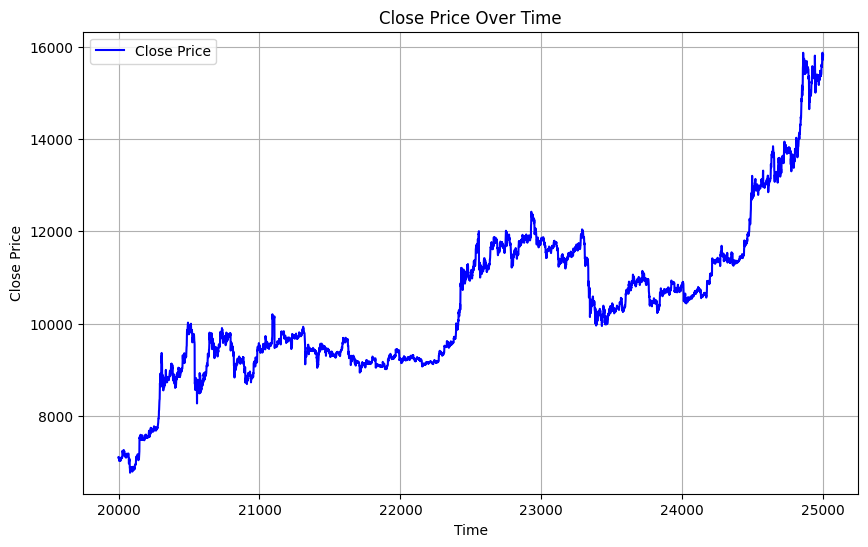

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a 'close' column
# You can replace this with your actual data

# Plotting the 'close' values
plt.figure(figsize=(10, 6))
plt.plot(data['close'][20000 : 25000], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

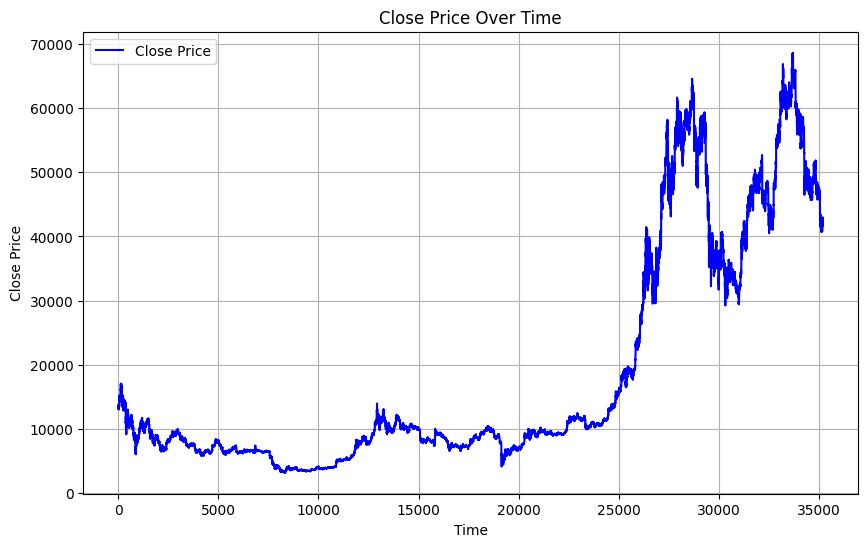

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a 'close' column
# You can replace this with your actual data

# Plotting the 'close' values
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pf.plot().show()

Classifier


In [ ]:
import numpy as np
x=np.random.rand(3,10)
# x=model.predict()

In [ ]:
y=model.predict(x)

1/1 [==============================] - 0s 102ms/step


In [ ]:
y.shape

(3, 2)

In [ ]:
y

array([[-0.9414489, -0.7473498],
       [-0.8909537, -0.7804881],
       [-0.8809539, -0.787707 ]], dtype=float32)